In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
path = 'C:/Users/Meier/Institut für Statistik Dropbox/Johanna Meier/Structural Breaks + DL/Figures/'

In [3]:
SMALL_SIZE = 26
MEDIUM_SIZE = 28
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

### Weights

In [4]:
obs_total = 1000*0.9     # no. of training obs.

In [5]:
alpha_exp = 0.005  # 0.005 / 0.01 / 0.02
alpha_Ray = 2*10**(-5) # 1*10**(-5) / 5*10**(-5) / 1*10**(-4)

In [6]:
weights_exp = []
weights_Ray = []
for i in range(int(obs_total)):
    weights_exp.append(np.exp(-alpha_exp*(obs_total-i)))  # exponential weight
    weights_Ray.append(np.exp(-(1/2)*alpha_Ray*(obs_total-i)**2)) # Rayleigh weights

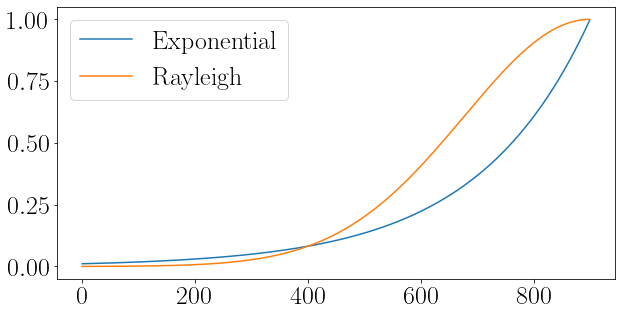

In [7]:
plt.figure(figsize=(10,5))
plt.plot(weights_exp, label='Exponential')
plt.plot(weights_Ray, label='Rayleigh')
plt.legend()
plt.show()

In [8]:
alpha_bart = obs_total**0.975 #  0 < alpha < T
alpha_parz = obs_total**0.975 # 0 < alpha < T
alpha_th = obs_total**0.975 # 0 < alpha < T

In [9]:
alpha_th

759.2528778023793

In [10]:
step = 0
weights_bart = []
weights_parz = []
weights_th = []
for i in range(int(obs_total)):
    # Bartlett kernel
    if ((obs_total-i)/alpha_bart)<=1:
        weights_bart.append(1-(obs_total-i)/alpha_bart)
    else:
        weights_bart.append(0) 
    # Parzen kernel
    if ((obs_total-i)/alpha_parz)>=0 and ((obs_total-i)/alpha_parz)<=0.5:
        weights_parz.append(1-6*((obs_total-i)/alpha_parz)**2+6*((obs_total-i)/alpha_parz)**3) 
    elif ((obs_total-i)/alpha_parz)>0.5 and ((obs_total-i)/alpha_parz)<=1:
        weights_parz.append(2*(1-((obs_total-i)/alpha_parz))**3) 
    else:
        weights_parz.append(0) 
    # Tukey-Hanning kernel
    if ((obs_total-i)/alpha_th)<=1:
        weights_th.append((1+np.cos(np.pi*((obs_total-i)/alpha_th)))/2) 
    else:
        weights_th.append(0)

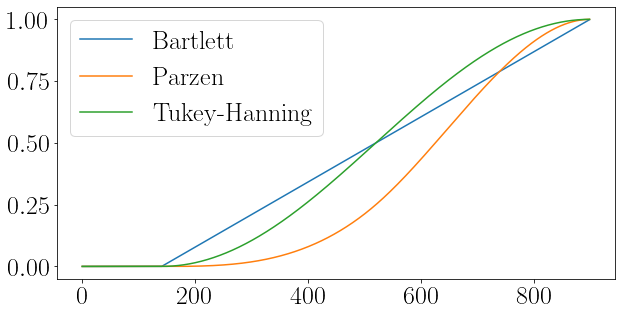

In [11]:
plt.figure(figsize=(10,5))
plt.plot(weights_bart, label='Bartlett')
plt.plot(weights_parz, label='Parzen')
plt.plot(weights_th, label='Tukey-Hanning')
plt.legend()
plt.show()

### Plot multiple parameters

In [12]:
obs_total = 1000     # no. of training obs.

In [13]:
cmap = plt.get_cmap("tab10")

In [14]:
#alpha_lin = np.array([0.5, 1, 1.5])
alpha_exp =np.array([0.005, 0.01, 0.02])
alpha_ray = np.array([2*10**(-5), 5*10**(-5), 1*10**(-4)])

fac = np.array([1, 0.95, 0.9])
alpha_bar = np.array([obs_total**fac[0], obs_total**fac[1], obs_total**fac[2]])
alpha_par = np.array([obs_total**fac[0], obs_total**fac[1], obs_total**fac[2]])
alpha_tuk = np.array([obs_total**fac[0], obs_total**fac[1], obs_total**fac[2]])

#weights_lin = np.zeros([alpha_lin.shape[0],int(obs_total)])
weights_exp = np.zeros([alpha_exp.shape[0],int(obs_total)])
weights_ray = np.zeros([alpha_ray.shape[0],int(obs_total)])
weights_bar = np.zeros([alpha_bar.shape[0],int(obs_total)])
weights_par = np.zeros([alpha_par.shape[0],int(obs_total)])
weights_tuk = np.zeros([alpha_tuk.shape[0],int(obs_total)])

for i in range(int(obs_total)):
    weights_exp[:,i] = np.exp(-alpha_exp*(obs_total-i))  # exponential weight
    weights_ray[:,i] = np.exp(-(1/2)*alpha_ray*(obs_total-i)**2) # Rayleigh weights
    
for j in range(alpha_tuk.shape[0]):
    for i in range(int(obs_total)):
        # Bartlett kernel
        if ((obs_total-i)/alpha_bar[j])<=1:
            weights_bar[j,i] = 1-(obs_total-i)/alpha_bar[j]
        else:
            weights_bar[j,i] = 0 
        # Parzen kernel
        if ((obs_total-i)/alpha_par[j])>=0 and ((obs_total-i)/alpha_par[j])<=0.5:
            weights_par[j,i] = (1-6*((obs_total-i)/alpha_par[j])**2+6*((obs_total-i)/alpha_par[j])**3) 
        elif ((obs_total-i)/alpha_par[j])>0.5 and ((obs_total-i)/alpha_par[j])<=1:
            weights_par[j,i] = 2*(1-((obs_total-i)/alpha_par[j]))**3 
        else:
            weights_par[j,i] = 0
        # Tukey-Hanning kernel
        if ((obs_total-i)/alpha_tuk[j])<=1:
            weights_tuk[j,i] = (1+np.cos(np.pi*((obs_total-i)/alpha_tuk[j])))/2
        else:
            weights_tuk[j,i] = 0

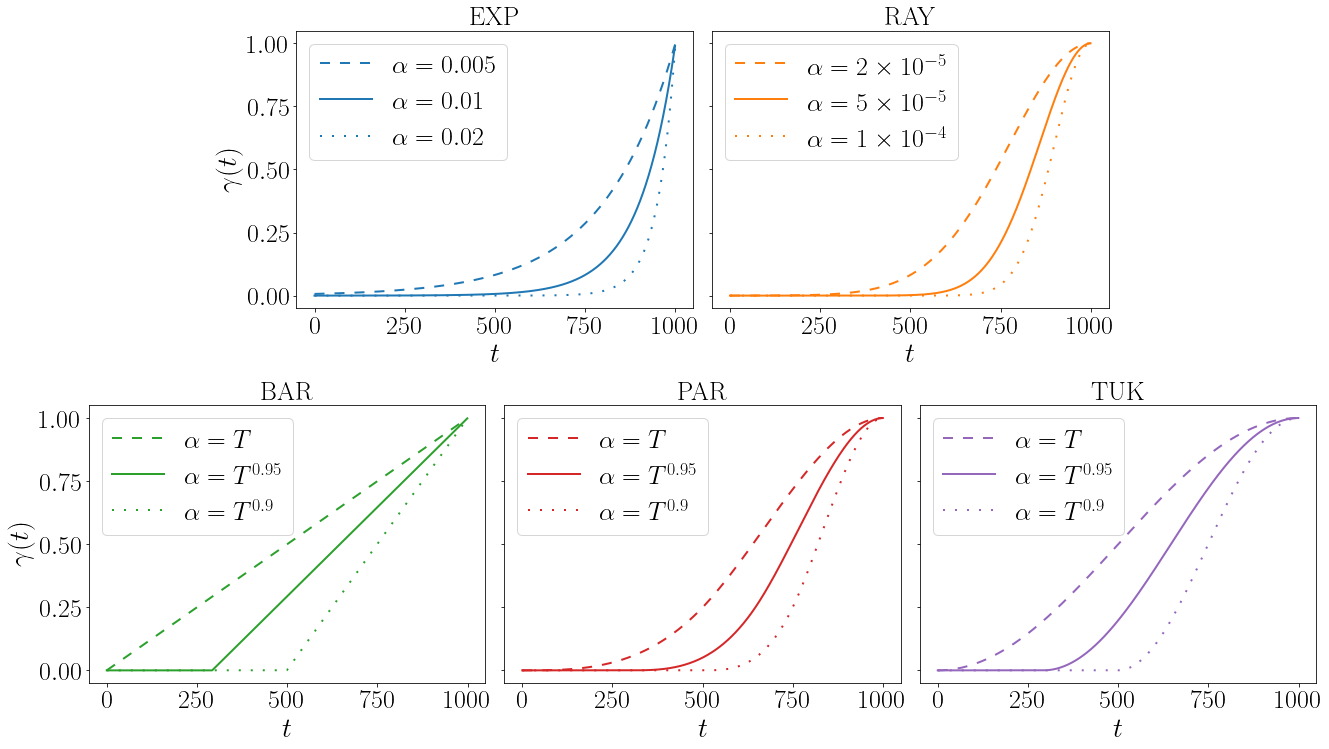

In [18]:
fig = plt.figure(figsize=(22,12))
spec = mpl.gridspec.GridSpec(ncols=6, nrows=2, hspace=0.35, wspace=0.1)

ax1 = fig.add_subplot(spec[0,1:3]) # row 0 with axes spanning 2 cols on odds
ax2 = fig.add_subplot(spec[0,3:5], sharey=ax1)
ax3 = fig.add_subplot(spec[1,0:2]) # row 0 with axes spanning 2 cols on evens
ax4 = fig.add_subplot(spec[1,2:4], sharey=ax3)
ax5 = fig.add_subplot(spec[1,4:], sharey=ax3)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), visible=False)
plt.setp(ax5.get_yticklabels(), visible=False)

ax1.plot(weights_exp[0,:], color=cmap(0), linestyle = (0, (5, 5)), linewidth=2, label=r'$\alpha=%s$'% alpha_exp[0])
ax1.plot(weights_exp[1,:], color=cmap(0), linestyle = '-', linewidth=2, label=r'$\alpha=%s$'% alpha_exp[1])
ax1.plot(weights_exp[2,:], color=cmap(0), linestyle = (0, (1, 5)), linewidth=2, label=r'$\alpha=%s$'% alpha_exp[2])
ax1.set_title('EXP')
ax1.set_xlabel(r'$t$')
ax1.set_ylabel(r'$\gamma(t)$')
ax1.legend()

ax2.plot(weights_ray[0,:], color=cmap(1), linestyle = (0, (5, 5)), linewidth=2, label=r'$\alpha=2\times10^{-5}$'% alpha_ray[0])
ax2.plot(weights_ray[1,:], color=cmap(1), linestyle = '-', linewidth=2, label=r'$\alpha=5\times10^{-5}$'% alpha_ray[1])
ax2.plot(weights_ray[2,:], color=cmap(1), linestyle = (0, (1, 5)), linewidth=2, label=r'$\alpha=1\times10^{-4}$'% alpha_ray[2])
ax2.set_title('RAY')
ax2.set_xlabel(r'$t$')
ax2.legend()

ax3.plot(weights_bar[0,:], color=cmap(2), linestyle = (0, (5, 5)), linewidth=2, label=r'$\alpha=T$')
ax3.plot(weights_bar[1,:], color=cmap(2), linestyle = '-', linewidth=2, label=r'$\alpha=T^{%s}$'% fac[1])
ax3.plot(weights_bar[2,:], color=cmap(2), linestyle = (0, (1, 5)), linewidth=2, label=r'$\alpha=T^{%s}$'% fac[2])
ax3.set_title('BAR')
ax3.set_xlabel(r'$t$')
ax3.set_ylabel(r'$\gamma(t)$')
ax3.legend()

ax4.plot(weights_par[0,:], color=cmap(3), linestyle = (0, (5, 5)), linewidth=2, label=r'$\alpha=T$')
ax4.plot(weights_par[1,:], color=cmap(3), linestyle = '-', linewidth=2, label=r'$\alpha=T^{%s}$'% fac[1])
ax4.plot(weights_par[2,:], color=cmap(3), linestyle = (0, (1, 5)), linewidth=2, label=r'$\alpha=T^{%s}$'% fac[2])
ax4.set_title('PAR')
ax4.set_xlabel(r'$t$')
ax4.legend()

ax5.plot(weights_tuk[0,:], color=cmap(4), linestyle = (0, (5, 5)), linewidth=2, label=r'$\alpha=T$')
ax5.plot(weights_tuk[1,:], color=cmap(4), linestyle = '-', linewidth=2, label=r'$\alpha=T^{%s}$'% fac[1])
ax5.plot(weights_tuk[2,:], color=cmap(4), linestyle = (0, (1, 5)), linewidth=2, label=r'$\alpha=T^{%s}$'% fac[2])
ax5.set_title('TUK')
ax5.set_xlabel(r'$t$')
ax5.legend()


plt.savefig(path+'lossweights.pdf', bbox_inches='tight')
plt.show()